In [1]:
import trueq as tq
import qiskit as qk ## IMPORTING LIBRARIES
import numpy as np

In [23]:
cycle1 = {0: tq.Gate.h}
cycle2 = {(0, 1): tq.Gate.cz}
cycle3 = {1: tq.Gate.h}

circuit = tq.Circuit([cycle1, cycle2, cycle3] * 3) ## CREATING TRUEQ CIRCUIT
circuit.measure_all()
circuit.draw()

DisplayWrapper(<svg xmlns="http://w...)

         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/trueq/results.py:722)
         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/trueq/results.py:722)
         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/trueq/results.py:722)
         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/trueq/results.py:722)
         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/trueq/results.py:722)
         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/trueq/results.py:722)
         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/trueq/results.py:722)
         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/trueq/results.py:722)


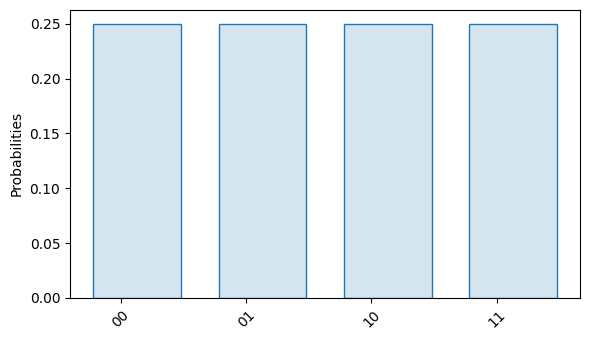

In [3]:
sim = tq.Simulator()
ideal_result = sim.sample(circuit, n_shots=np.inf) ## IDEAL OUTCOME IN TRUEQ
ideal_result.plot()

In [4]:
n_compilations = 30
rc_circuits = tq.randomly_compile(circuit, n_compilations=n_compilations) ## RC with 30 COMPILATIONS

In [5]:
rc_circuits[0].draw() #EXAMPLE OF 1st CIRCUIT

DisplayWrapper(<svg xmlns="http://w...)

         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/qiskit/visualization/circuit/matplotlib.py:266)


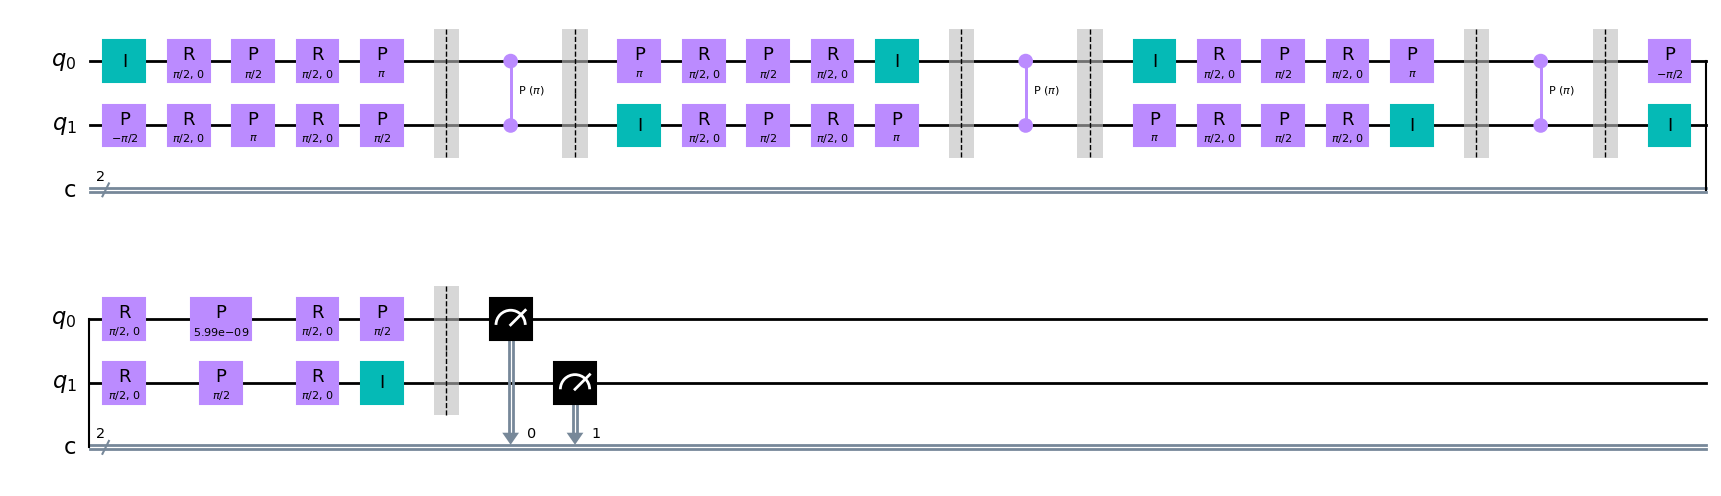

In [6]:
qiskit_circuits = [tq.interface.qiskit.from_trueq_circ(i) for i in rc_circuits] ## CONVERTING ALL TRUEQ CIRCUITS INTO QISKIT
qiskit_circuits[0].draw('mpl') ## THIS IS HOW THE TRUEQ CIRCUIT ABOVE LOOKS IN QISKIT

In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeSherbrooke ## IMPORTING LIBRARIES FOR BACKEND
from qiskit.visualization import plot_histogram

backend = AerSimulator.from_backend(FakeSherbrooke())

         (/var/folders/wz/lbx10qps1tdc1npmd3kbq2t00000gn/T/ipykernel_7362/2054880896.py:6)


In [8]:
transpiled_circuits = transpile(qiskit_circuits, backend) ## TRANSPILED ALL THE QISKIT CIRCUITS

In [44]:
from collections import defaultdict

final_count = []
count_dict = defaultdict(int)

for circuit in transpiled_circuits:
    job = backend.run(circuit,shots =  200)
    counts = job.result().get_counts()
    final_count.append(counts)

In [45]:
final_count ## LIST OF FINAL COUNT OF ALL 30 CIRCUITS

[{'01': 50, '10': 46, '00': 49, '11': 55},
 {'01': 46, '10': 51, '00': 56, '11': 47},
 {'01': 46, '10': 50, '00': 59, '11': 45},
 {'01': 37, '10': 67, '00': 47, '11': 49},
 {'01': 55, '00': 45, '11': 52, '10': 48},
 {'01': 47, '00': 45, '10': 58, '11': 50},
 {'01': 52, '00': 53, '11': 47, '10': 48},
 {'00': 48, '11': 48, '10': 53, '01': 51},
 {'01': 56, '11': 46, '00': 50, '10': 48},
 {'01': 55, '00': 46, '10': 48, '11': 51},
 {'01': 57, '11': 48, '10': 47, '00': 48},
 {'01': 43, '00': 50, '10': 52, '11': 55},
 {'00': 51, '11': 43, '10': 57, '01': 49},
 {'01': 50, '10': 50, '00': 62, '11': 38},
 {'01': 44, '00': 50, '11': 59, '10': 47},
 {'01': 45, '11': 50, '00': 52, '10': 53},
 {'01': 48, '11': 60, '10': 44, '00': 48},
 {'11': 40, '10': 56, '00': 54, '01': 50},
 {'01': 51, '10': 51, '11': 44, '00': 54},
 {'00': 43, '11': 55, '10': 46, '01': 56},
 {'01': 49, '10': 54, '00': 48, '11': 49},
 {'01': 57, '11': 47, '00': 53, '10': 43},
 {'01': 59, '00': 40, '11': 46, '10': 55},
 {'01': 42,

In [46]:
for counts in final_count: ## THIS CODE ADDS ALL THE COUNTS FROM THE 30 CIRCUITS
    for key, value in counts.items():
        count_dict[key] += value

rc_result = count_dict ## RENAMING FOR CLARITY

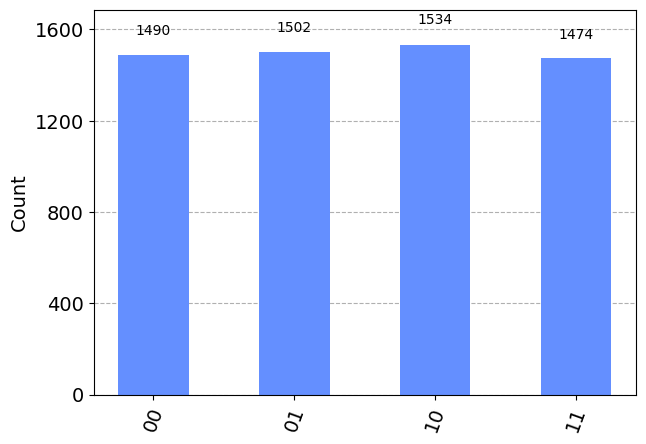

In [47]:
plot_histogram(count_dict) ## PLOT OF ADDITION OF ALL THE COUNTS

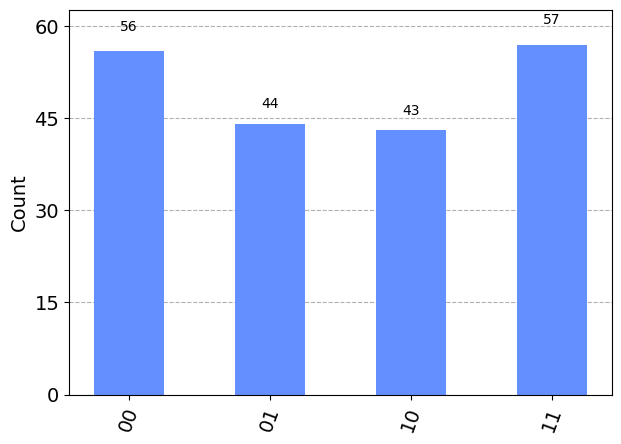

In [50]:
circuit = tq.Circuit([cycle1, cycle2, cycle3] * 3) ## REDEFINING THE ORIGINAL TRUEQ CIRCUIT
noisy_qiskit = tq.interface.qiskit.from_trueq_circ(circuit) ## NOISY CIRCUIT
noisy_transpiled = transpile(noisy_qiskit,backend)
noisy_job = backend.run(noisy_transpiled,shots =  200)
noisy_counts = job.result().get_counts()
plot_histogram(noisy_counts)

         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/trueq/results.py:722)
         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/trueq/results.py:722)
         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/trueq/results.py:722)
         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/trueq/results.py:722)
         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/trueq/results.py:722)
         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/trueq/results.py:722)
         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/trueq/results.py:722)
         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/trueq/results.py:722)
         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/trueq/results.py:722)
         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages/trueq/results.py:722)
         (/opt/miniconda3/envs/my_x86_env/lib/python3.12/site-packages

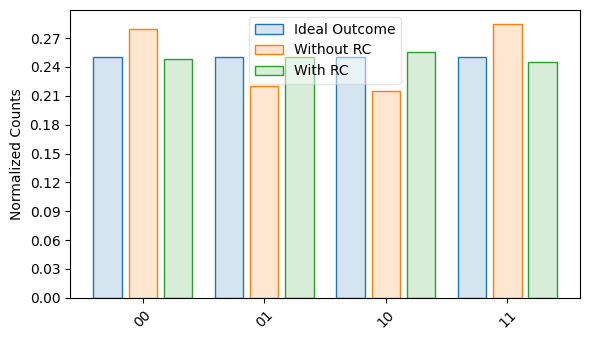

In [51]:
from trueq import Results ## We will now convert all the Qiskit counts into TrueQ counts

tq_rc_result = Results(rc_result)
tq_noisy_result = Results(noisy_counts)

tq.visualization.plot_results(
    ideal_result,
    tq_noisy_result,
    tq_rc_result,
    labels=["Ideal Outcome", "Without RC", "With RC"],
)